# QAOA for Portfolio Optimization, Toy Example - circuit validation
In this notebook a small portfolio optimization problem is solved using QAOA. We incorporate the fixed budget constraint using two different methods, namely the penalty method and the XY-mixer method. The quantum circuit used is shown for both methods and the approximation ratio for depth = 1 is computed for the two methods.

# Import neceassry modules

In [1]:
try:
    from qaoa import QAOA, problems, mixers, initialstates
except ImportError:
    from qaoa import QAOA, problems, mixers, initialstates



In [2]:
from asset_loader import AssetData

import os
import sys

from qaoa.util.plotroutines import *
from matplotlib import pyplot as pl

import itertools

# Creating problem instance

/home/havahol/playground/quantumComputing-wls/QAOA/examples/PortfolioOptimization/asset_loader.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=-30)


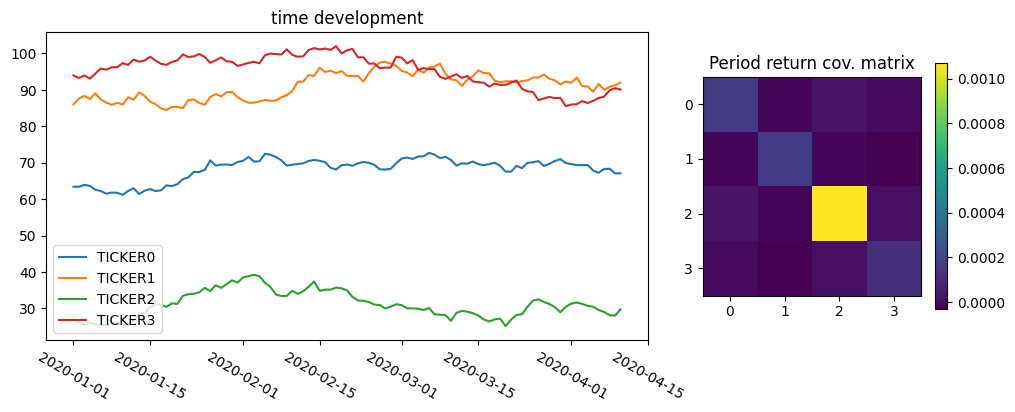

In [3]:
number_of_assets = 4
budget = 2

filename = os.path.join(
    "data", "qiskit_finance_seeds.npz"
)  # filename of file containing time series of
# non-crashing stocks.
seeds = np.load(filename)
assets = AssetData(number_of_assets, seed=seeds[str(number_of_assets)][132])

assets.plotAssets()

# Creating QAOA instances for both methods
Below we create a QAOA instance for both the penalty method and for the XY-mixer method.
The gamma_scale parameter is used to adjust the search range for the gamma parameter. 

For information about the scale parameter see Sebastian Brandhofer et al. “Benchmarking the performance of portfolio optimization with QAOA”. In: Quantum Information Processing 22.1 (2023), page 25-26)
or Zichang He et al. Alignment between Initial State and Mixer Improves QAOA Performance for 
Constrained Portfolio Optimization page 7 (2023)

In [4]:
def get_problem(penalty=None):
    if not penalty:
        return problems.PortfolioOptimization(
            risk=0.5 * gamma_scale,
            budget=budget,
            cov_matrix=assets.cov_matrix,
            exp_return=assets.exp_return * gamma_scale,
        )
    else:
        return problems.PortfolioOptimization(
            risk=0.5 * gamma_scale,
            budget=budget,
            cov_matrix=assets.cov_matrix,
            exp_return=assets.exp_return * gamma_scale,
            penalty=penalty,
        )

In [5]:
gamma_scale = 50  # Adjusts the search range for the gamma parameter
qaoa_penalty = {}
qaoa_XYmixer_chain = {}
qaoa_XYmixer_ring = {}
qaoa_Grover = {}
for cvar in [0.1, 1]:
    qaoa_penalty[cvar] = QAOA(
        initialstate=initialstates.Plus(),
        problem=get_problem(4 * gamma_scale),
        mixer=mixers.X(),
        cvar=cvar,
    )

    qaoa_XYmixer_chain[cvar] = QAOA(
        initialstate=initialstates.Dicke(budget),
        problem=get_problem(),
        mixer=mixers.XY(case="chain"),
        cvar=cvar,
    )

    qaoa_XYmixer_ring[cvar] = QAOA(
        initialstate=initialstates.Dicke(budget),
        problem=get_problem(),
        mixer=mixers.XY(case="ring"),
        cvar=cvar,
    )

    qaoa_Grover[cvar] = QAOA(
        initialstate=initialstates.Dicke(budget),
        problem=get_problem(),
        mixer=mixers.Grover(initialstates.Dicke(budget)),
        cvar=cvar,
    )

In [6]:
qaoa_XYmixer_chain[1].initialstate.N_qubits

4

# Validation

In [7]:
qaoa_XYmixer_chain[1].validate_circuit()

(np.True_,
 {'n_qubits': 4,
  'max_magnitude_error': 3.3306690738754696e-16,
  'max_phase_error_rad_after_global': 4.1546023157304846e-17,
  'global_phase_rad': -0.04401520954793148,
  'max_qubo_cost_vs_cost_error': 0})

In [8]:
qaoa_penalty[1].validate_circuit()

(np.True_,
 {'n_qubits': 4,
  'max_magnitude_error': 2.220446049250313e-16,
  'max_phase_error_rad_after_global': 9.219046252978099e-14,
  'global_phase_rad': -1.1059450392946608,
  'max_qubo_cost_vs_cost_error': 0})

In [9]:
for cvar in [0.1, 1]:
    print(qaoa_penalty[cvar].validate_circuit())
    print(qaoa_XYmixer_chain[cvar].validate_circuit())
    print(qaoa_XYmixer_ring[cvar].validate_circuit())
    print(qaoa_Grover[cvar].validate_circuit())
    

(np.True_, {'n_qubits': 4, 'max_magnitude_error': 2.220446049250313e-16, 'max_phase_error_rad_after_global': 9.219046252978099e-14, 'global_phase_rad': -1.1059450392946608, 'max_qubo_cost_vs_cost_error': 0})
(np.True_, {'n_qubits': 4, 'max_magnitude_error': 3.3306690738754696e-16, 'max_phase_error_rad_after_global': 4.1546023157304846e-17, 'global_phase_rad': -0.04401520954793148, 'max_qubo_cost_vs_cost_error': 0})
(np.True_, {'n_qubits': 4, 'max_magnitude_error': 3.3306690738754696e-16, 'max_phase_error_rad_after_global': 4.1546023157304846e-17, 'global_phase_rad': -0.04401520954793148, 'max_qubo_cost_vs_cost_error': 0})
(np.True_, {'n_qubits': 4, 'max_magnitude_error': 3.3306690738754696e-16, 'max_phase_error_rad_after_global': 4.1546023157304846e-17, 'global_phase_rad': -0.04401520954793148, 'max_qubo_cost_vs_cost_error': 0})
(np.True_, {'n_qubits': 4, 'max_magnitude_error': 2.220446049250313e-16, 'max_phase_error_rad_after_global': 9.219046252978099e-14, 'global_phase_rad': -1.1059